## Introduction to Data Science | 4022 | Dr. Bahrak & Dr. Yaghoobzadeh
## CA2
***
### Amirreza Akbari | 810899045
### Reza Baghestani | 810899046
### Hananeh Jamali | 810899053
### Mohammad Yaser Azad | 810800003
***
### 1402/01/20

## Install & Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

# Check if forex-python is installed
if importlib.util.find_spec("forex_python") is None:
    # Install forex-python
    !pip install forex-python
    
from sklearn.preprocessing import LabelEncoder
from forex_python.converter import CurrencyRates


## Task 1
passengers of the sunken ship ‘RMS Lusitania’

### 1. Read the file, save it in a pandas dataframe, apply 'info', 'head', 'tail' and 'describe' methods

In [2]:
# Read the file into a pandas DataFrame
df = pd.read_csv('task1.csv')

print("----------------------------------------------------------------------------")
# Use the 'info' method to get a concise summary of the DataFrame
print("Info:")
print(df.info())

print("\n----------------------------------------------------------------------------")
# Use the 'head' method to display the first few rows of the DataFrame (default: 5 rows)
print("First few rows:")
print(df.head())

print("\n----------------------------------------------------------------------------")
# Use the 'tail' method to display the last few rows of the DataFrame (default: 5 rows)
print("Last few rows:")
print(df.tail())

print("\n----------------------------------------------------------------------------")
# Use the 'describe' method to generate descriptive statistics of numerical columns of the DataFrame 
print("Descriptive statistics:")
print(df.describe())


----------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None

--------------------

### 2. Modify the non-numerical columns for processing by labeling

In [3]:
# Read the file into a pandas DataFrame
df = pd.read_csv('task1.csv')

# Show the original type of each data column
print("----------------------------------------------------------------------------")
print("Original Data Types:")
print(df.dtypes)

# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

# Print categorical and numerical columns separately
print("\n----------------------------------------------------------------------------")
print("Categorical Columns:")
print(categorical_columns)
print("\n----------------------------------------------------------------------------")
print("Numerical Columns:")
print(numerical_columns)

# Convert non-numerical columns to categorical data
df[categorical_columns] = df[categorical_columns].astype('category')

# Perform label encoding for non-numerical columns
for column in categorical_columns:
    # Get the codes for each category, including null values encoded as -1
    df[column] = df[column].cat.codes
    # Convert -1 values back to null
    df[column] = df[column].replace(-1, None)

# Show the type of each data column after label encoding
print("\n----------------------------------------------------------------------------")
print("Data Types After Label Encoding:")
print(df.dtypes)

# Show the first few rows (default: 5 rows) of the modified DataFrame
print("\n----------------------------------------------------------------------------")
print("Modified DataFrame:")
print(df.head())


----------------------------------------------------------------------------
Original Data Types:
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

----------------------------------------------------------------------------
Categorical Columns:
Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')

----------------------------------------------------------------------------
Numerical Columns:
Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone'],
      dtype='object')

----------------------------------------------------------------------------
Data Types After Label Encoding:
survived         int64
pclass 

### 3. Heatmap of the correlation matrix for numerical features

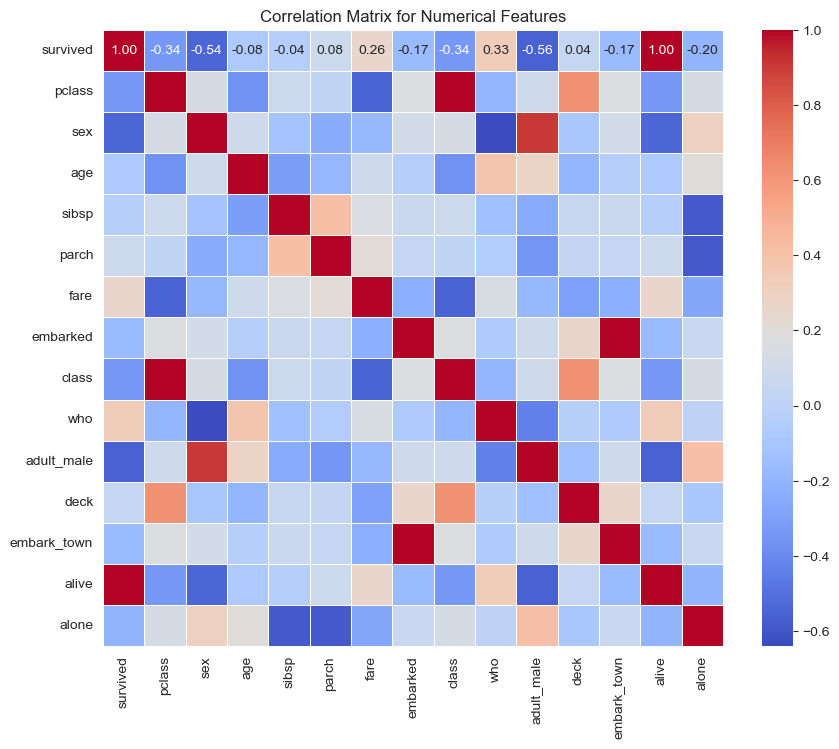

In [4]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


### 4. Delete the extra columns with a correlation of 1

----------------------------------------------------------------------------
Extra columns to be deleted:
alive
class
embark_town

----------------------------------------------------------------------------
DataFrame after removing extra columns:
   survived  pclass  sex   age  sibsp  parch     fare embarked  who  \
0         0       3    1  22.0      1      0   7.2500        2    1   
1         1       1    0  38.0      1      0  71.2833        0    2   
2         1       3    0  26.0      0      0   7.9250        2    2   
3         1       1    0  35.0      1      0  53.1000        2    2   
4         0       3    1  35.0      0      0   8.0500        2    1   

   adult_male  deck  alone  
0        True  None  False  
1       False     2  False  
2       False  None   True  
3       False     2  False  
4        True  None   True  

----------------------------------------------------------------------------


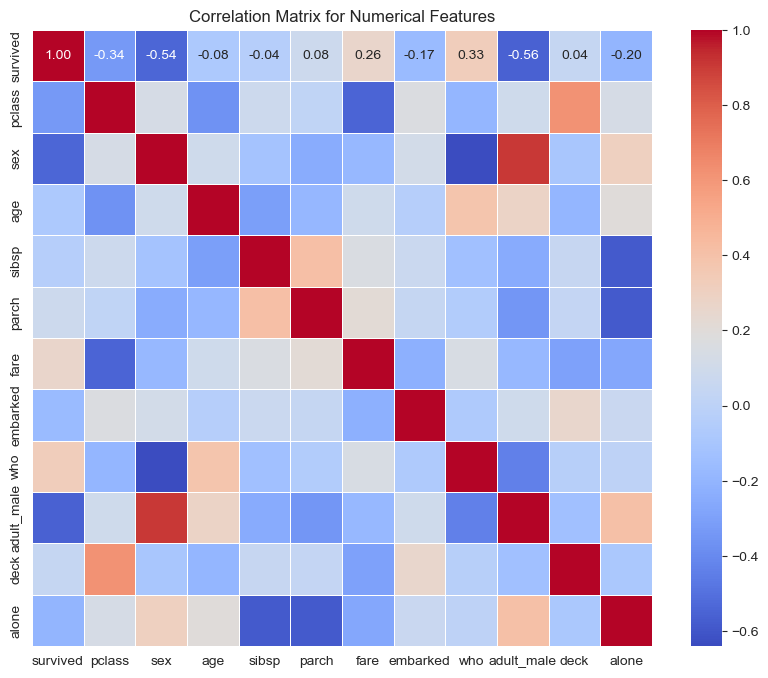

In [5]:
# Get indices of upper triangle of correlation matrix
upper_triangle_indices = np.where(~np.tril(np.ones(correlation_matrix.shape)).astype(np.bool_))

# Find columns with correlation 1 that are not on the main diagonal
extra_columns = []
for i, j in zip(upper_triangle_indices[0], upper_triangle_indices[1]):
    if i != j and correlation_matrix.iloc[i, j] == 1:
        extra_columns.append(correlation_matrix.columns[j])
        
# Print extra columns
print("----------------------------------------------------------------------------")
print("Extra columns to be deleted:")
for column in extra_columns:
    print(column)

# Drop extra columns
df.drop(extra_columns, axis=1, inplace=True)

# Show the first few rows (default: 5 rows) of the modified DataFrame
print("\n----------------------------------------------------------------------------")
print("DataFrame after removing extra columns:")
print(df.head())

# Compute the correlation matrix
correlation_matrix = df.corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
print("\n----------------------------------------------------------------------------")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

# Save the modified DataFrame to a CSV file
df.to_csv('task1_modified.csv', index=False)

### 5. Number of survivors

In [6]:
# Count the number of passengers who survived (survived == 1)
survived_passengers = df[df['survived'] == 1]
num_survived = survived_passengers.shape[0]

# Print the number of passengers who survived
print("Number of passengers who survived:", num_survived)


Number of passengers who survived: 342


### 6. Number of female passengers aged more than 30 years

In [7]:
# Filter female passengers aged more than 30 years (sex: female == 0, male == 1)
female_passengers_over_30 = df[(df['sex'] == 0) & (df['age'] > 30)]

# Count the number of female passengers aged more than 30 years
num_female_passengers_over_30 = female_passengers_over_30.shape[0]

# Print the number of female passengers aged more than 30 years
print("Number of female passengers aged more than 30 years:", num_female_passengers_over_30)


Number of female passengers aged more than 30 years: 103


### 7. Number of passengers embarked from Cherbourg and paid a fare greater than 100$

In [8]:
# Filter passengers who embarked from Cherbourg and paid a fare greater than $100 (embarked: Cherbourg == 0, Queenstown == 1, Southamptonn == 2)
cherbourg_passengers_high_fare = df[(df['embarked'] == 0) & (df['fare'] > 100)]

# Count the number of female passengers aged more than 30 years
num_cherbourg_passengers_high_fare = cherbourg_passengers_high_fare.shape[0]

# Print the number of the passengers who meet the criteria
print("Number of passengers who embarked from Cherbourg and paid a fare greater than $100:")
print(num_cherbourg_passengers_high_fare)

# Display the passengers who meet the criteria
print("\nPassengers who embarked from Cherbourg and paid a fare greater than $100:")
print(cherbourg_passengers_high_fare)


Number of passengers who embarked from Cherbourg and paid a fare greater than $100:
29

Passengers who embarked from Cherbourg and paid a fare greater than $100:
     survived  pclass  sex   age  sibsp  parch      fare embarked  who  \
31          1       1    0   NaN      1      0  146.5208        0    2   
118         0       1    1  24.0      0      1  247.5208        0    1   
195         1       1    0  58.0      0      0  146.5208        0    2   
215         1       1    0  31.0      1      0  113.2750        0    2   
258         1       1    0  35.0      0      0  512.3292        0    2   
299         1       1    0  50.0      0      1  247.5208        0    2   
306         1       1    0   NaN      0      0  110.8833        0    2   
307         1       1    0  17.0      1      0  108.9000        0    2   
311         1       1    0  18.0      2      2  262.3750        0    2   
319         1       1    0  40.0      1      1  134.5000        0    2   
325         1       1   

### 8. Handling missing values

In [9]:
# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

# Display columns with missing values and the number of missing values in each column
print("Columns with missing values:")
print(columns_with_missing_values)
print("\nNumber of missing values in each column:")
print(df[columns_with_missing_values].isnull().sum())

# Strategy for handling missing values: Imputation
# Let's fill missing numerical values with the mean and missing categorical values with the mode

# Impute missing numerical values with the mean
for column in df.select_dtypes(include=['float64', 'int64', 'int8']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Impute missing categorical values with the mode
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Verify that there are no missing values left
print("\nNumber of missing values after imputation:")
print(df[columns_with_missing_values].isnull().sum())

# Save the modified DataFrame to a CSV file
df.to_csv('task1_modified_without_null.csv', index=False)


Columns with missing values:
Index(['age', 'embarked', 'deck'], dtype='object')

Number of missing values in each column:
age         177
embarked      2
deck        688
dtype: int64

Number of missing values after imputation:
age         0
embarked    0
deck        0
dtype: int64


### 9. Average age of passengers

In [10]:
# Calculate the average age of all passengers
average_age_all = df['age'].mean()

# Calculate the average age for males and females separately
average_age_male = df[df['sex'] == 1]['age'].mean()
average_age_female = df[df['sex'] == 0]['age'].mean()

# Display the results
print(f"Average age of all passengers: {average_age_all:.2f} years")
print(f"Average age of male passengers: {average_age_male:.2f} years")
print(f"Average age of female passengers: {average_age_female:.2f} years")


Average age of all passengers: 29.70 years
Average age of male passengers: 30.51 years
Average age of female passengers: 28.22 years


### 10. Correlation between fare paid and survival rate

In [11]:
# Provide a statistical summary
fare_summary = df['fare'].describe()
survival_summary = df['survived'].describe()

# Create a new data frame for survived people
survived_df = df[df['survived'] == 1]
survive_fare_summary = survived_df['fare'].describe()

# Calculate the correlation coefficient between fare paid and survival rate
correlation = df['fare'].corr(df['survived'])

# Calculate the average fare for survivors and non-survivors
average_fare_survived = df[df['survived'] == 1]['fare'].mean()
average_fare_not_survived = df[df['survived'] == 0]['fare'].mean()

# Display the results
print("Fare Paid Summary:")
print(fare_summary)
print("Survived Paid Summary:")
print(survive_fare_summary )
print("\nSurvival Rate Summary:")
print(survival_summary)
print(f"\nCorrelation between fare paid and survival rate: {correlation:.2f}")
print(f"Average fare for survivors: {average_fare_survived:.2f}")
print(f"Average fare for non-survivors: {average_fare_not_survived:.2f}")


Fare Paid Summary:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64
Survived Paid Summary:
count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: fare, dtype: float64

Survival Rate Summary:
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64

Correlation between fare paid and survival rate: 0.26
Average fare for survivors: 48.40
Average fare for non-survivors: 22.12


### 11. Plot the proportion of survivors by class

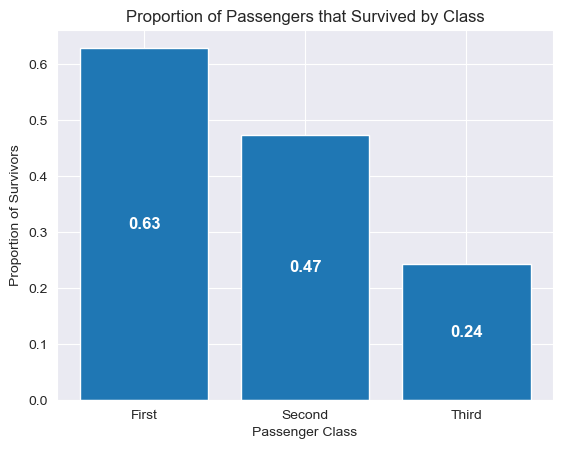

In [12]:
# Calculate the proportion of passengers that survived by class
survival_proportion_by_class = df.groupby('pclass')['survived'].mean()

# Plot the proportion of passengers that survived by class
plt.bar(survival_proportion_by_class.index, survival_proportion_by_class.values)

# Annotate each bar with its corresponding value
for i, value in enumerate(survival_proportion_by_class.values):
    plt.text(i + 1, value / 2, f'{value:.2f}', ha='center', va='center', fontsize=12, color='white', fontweight='bold')
    
plt.xlabel('Passenger Class')
plt.ylabel('Proportion of Survivors')
plt.title('Proportion of Passengers that Survived by Class')
plt.xticks(survival_proportion_by_class.index, labels=['First', 'Second', 'Third'])
plt.show()


### 12. Age distribution of passengers

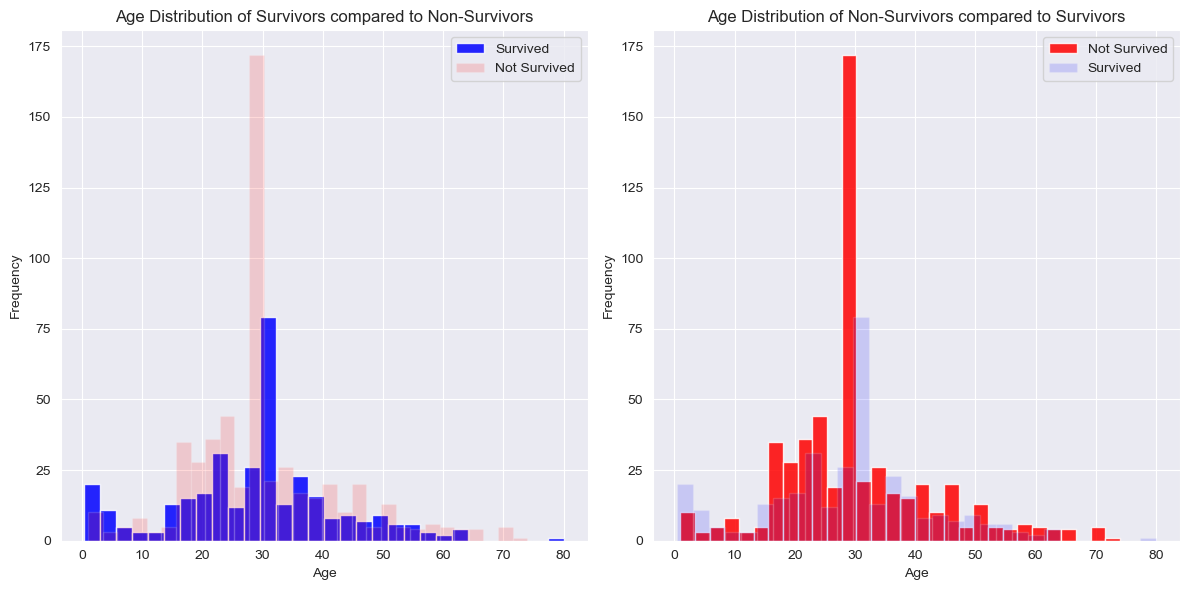

In [13]:
# Create a figure and two subplots side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the age distribution of survivors
axs[0].hist(df[df['survived'] == 1]['age'].dropna(), bins=30, alpha=0.85, label='Survived', color='blue')
axs[0].hist(df[df['survived'] == 0]['age'].dropna(), bins=30, alpha=0.15, label='Not Survived', color='red')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Age Distribution of Survivors compared to Non-Survivors')
axs[0].grid(True)
axs[0].legend()

# Plot the age distribution of non-survivors
axs[1].hist(df[df['survived'] == 0]['age'].dropna(), bins=30, alpha=0.85, label='Not Survived', color='red')
axs[1].hist(df[df['survived'] == 1]['age'].dropna(), bins=30, alpha=0.15, label='Survived', color='blue')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Age Distribution of Non-Survivors compared to Survivors')
axs[1].grid(True)
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


### 13. Relationship between age and fare paid, color-coded by survival

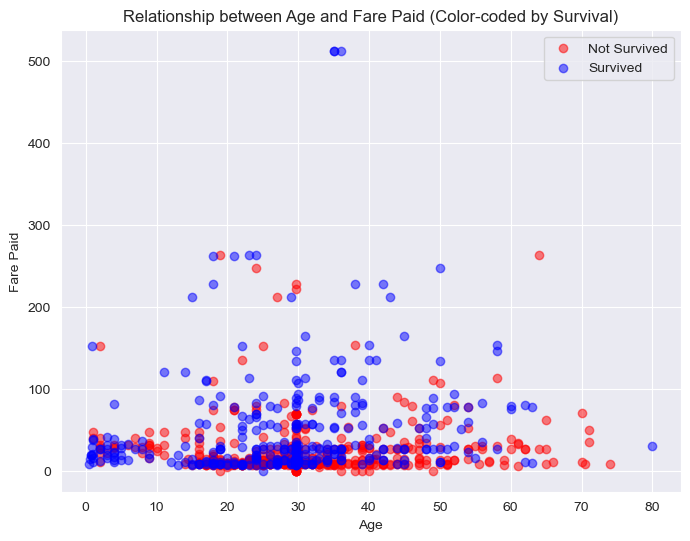

In [14]:
# Define colors for survivors (blue) and non-survivors (red)
colors = {0: 'red', 1: 'blue'}

# Create a scatter plot
plt.figure(figsize=(8, 6))
for status, color in colors.items():
    plt.scatter(df[df['survived'] == status]['age'], df[df['survived'] == status]['fare'], color=color, alpha=0.5, label='Survived' if status == 1 else 'Not Survived')

# Add labels, title and legend
plt.xlabel('Age')
plt.ylabel('Fare Paid')
plt.title('Relationship between Age and Fare Paid (Color-coded by Survival)')
plt.legend()

# Show plot
plt.show()


### 14. Pivot table to show the average fare and survival rate for each class and sex combination

In [15]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Convert 'sex' column to categorical data
df_copy['sex'] = df_copy['sex'].astype('category')
df_copy['sex'] = df_copy['sex'].cat.rename_categories({0: 'female', 1: 'male'})

# Create a pivot table
pivot_table = df_copy.pivot_table(index=['sex', 'pclass'], values=['fare', 'survived'], aggfunc={'fare': 'mean', 'survived': 'mean'})

# Rename columns for clarity
pivot_table.columns = ['Average Fare', 'Survival Rate']

# Display the pivot table
print(pivot_table)


               Average Fare  Survival Rate
sex    pclass                             
female 1         106.125798       0.968085
       2          21.970121       0.921053
       3          16.118810       0.500000
male   1          67.226127       0.368852
       2          19.741782       0.157407
       3          12.661633       0.135447


### 15. Plot a grouped bar chart to show the average fare paid by passengers, grouped by their class and survival status.

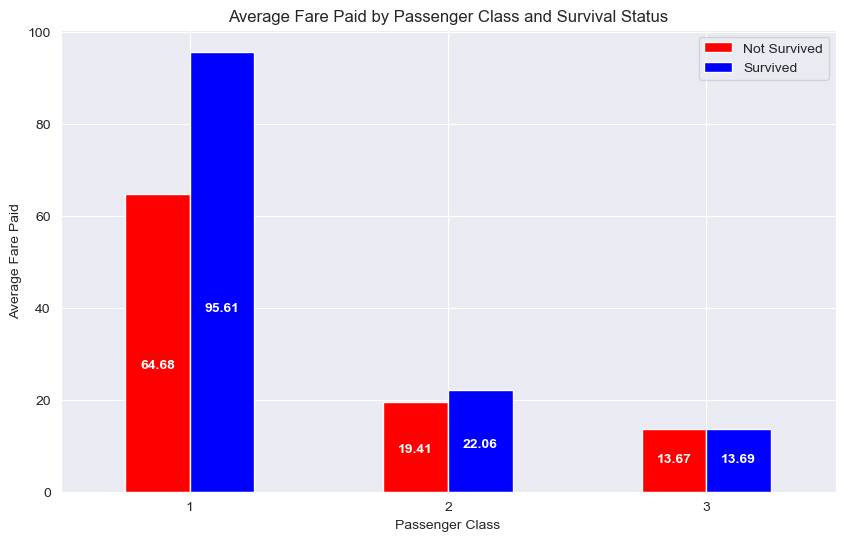

In [16]:
# Group the data by 'pclass' and 'survived', and calculate the average fare for each group
grouped_data = df.groupby(['pclass', 'survived'])['fare'].mean().unstack()

# Plot the grouped bar chart
ax = grouped_data.plot(kind='bar', figsize=(10, 6), color=['red', 'blue'])

# Add labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare Paid')
plt.title('Average Fare Paid by Passenger Class and Survival Status')
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal

# Add values to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2.5), ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=10, color='white', fontweight='bold')

# Add legend
plt.legend(['Not Survived', 'Survived'])

# Show plot
plt.show()


## Task 2
data scientist salaries across different regions from 2020 to 2024

### 1. Identify and remove duplicates

In [17]:
# Load the dataset
df = pd.read_csv('task2.csv')

# Check for duplicates
duplicate_rows = df[df.duplicated()]

# Remove duplicates
df = df.drop_duplicates()

# Check the shape of the dataframe after removing duplicates
print("Shape of dataframe after removing duplicates:", df.shape)


Shape of dataframe after removing duplicates: (8407, 8)


### 2. Identify and handle missing data (NA)

In [18]:
# Check for missing values
missing_values = df.isnull().sum()

# Handle missing values (if any)
# For example, you can drop rows with missing values: 
df = df.dropna()

# Check for missing values again after handling
print("Missing values after handling:", missing_values)
print("Shape of dataframe after dropping missing_values:", df.shape)

Missing values after handling: Work_Year           0
Experience_Level    0
Employment_Type     0
Job_Title           0
Salary              0
Salary_Currency     0
Remote_Ratio        0
Company_Size        0
dtype: int64
Shape of dataframe after dropping missing_values: (8407, 8)


### 3. Standardize salaries to a single currency
This code will filter out rows associated with currencies that are represented fewer than ten times, ensuring that we focus on currencies with sufficient data for meaningful analysis.

In [19]:
# Identify the frequencies of each currency
currency_frequencies = df['Salary_Currency'].value_counts()

# Remove data associated with currencies represented fewer than ten times
currencies_to_keep = currency_frequencies[currency_frequencies >= 10].index
df = df[df['Salary_Currency'].isin(currencies_to_keep)]

# Check the shape of the dataframe after removing infrequent currencies
print("Shape of dataframe after removing infrequent currencies:", df.shape)


Shape of dataframe after removing infrequent currencies: (8360, 8)


### 4. converting currencies to USD


In [20]:
# Create an instance of the CurrencyRates class
c = CurrencyRates()

# Fetch the exchange rate for each currency to USD
exchange_rates = {}
for currency in currencies_to_keep:
    rate = c.get_rate(currency, 'USD')
    exchange_rates[currency] = rate

# Convert salaries to USD based on the exchange rates
df['Salary_in_USD'] = df.apply(lambda row: row['Salary'] * exchange_rates[row['Salary_Currency']], axis=1)

# Update the 'Salary_Currency' column to reflect the conversion to USD
df['Salary_Currency'] = 'USD'

# Display the first few rows of the dataframe with salaries converted to USD
print(df.head())


   Work_Year Experience_Level Employment_Type                  Job_Title  \
0       2024     Senior-Level       Full-Time                AI Engineer   
1       2024     Senior-Level       Full-Time  Machine Learning Engineer   
2       2024     Senior-Level       Full-Time  Machine Learning Engineer   
3       2024     Senior-Level       Full-Time  Machine Learning Engineer   
4       2024     Senior-Level       Full-Time  Machine Learning Engineer   

   Salary Salary_Currency  Remote_Ratio Company_Size  Salary_in_USD  
0   90000             USD             0        Large        90000.0  
1  180500             USD             0       Medium       180500.0  
2   96200             USD             0       Medium        96200.0  
3  235000             USD             0       Medium       235000.0  
4  175000             USD             0       Medium       175000.0  


### 5. Identify the Top 10 Most Popular Job Titles

In [21]:
# Count the occurrences of each job title
top_job_titles = df['Job_Title'].value_counts().head(10)

# Display the top 10 most popular job titles
print("Top 10 Most Popular Job Titles:")
print(top_job_titles)


Top 10 Most Popular Job Titles:
Job_Title
Data Engineer                1584
Data Scientist               1548
Data Analyst                 1141
Machine Learning Engineer     797
Analytics Engineer            315
Research Scientist            265
Data Architect                224
Research Engineer             177
Data Science                  140
ML Engineer                   134
Name: count, dtype: int64


### 6. Identify the Top 10 Highest Salaries


In [22]:
# Sort the dataset by salary in descending order
highest_salaries = df.sort_values(by='Salary_in_USD', ascending=False).head(10)

# Display the top 10 highest salaries
print("Top 10 Highest Salaries:")
print(highest_salaries[['Job_Title', 'Salary_in_USD']])


Top 10 Highest Salaries:
                       Job_Title  Salary_in_USD
242                 AI Architect       800000.0
1085                Data Analyst       774000.0
4936              Data Scientist       750000.0
2060  Machine Learning Scientist       750000.0
3844  Machine Learning Scientist       750000.0
3850   Machine Learning Engineer       750000.0
1884          Analytics Engineer       750000.0
2471                Data Analyst       750000.0
4828               Data Engineer       750000.0
3286          Research Scientist       720000.0


### Visualization
This code will generate three subplots, each displaying the distribution of salaries, job titles, and remote work ratios respectively.



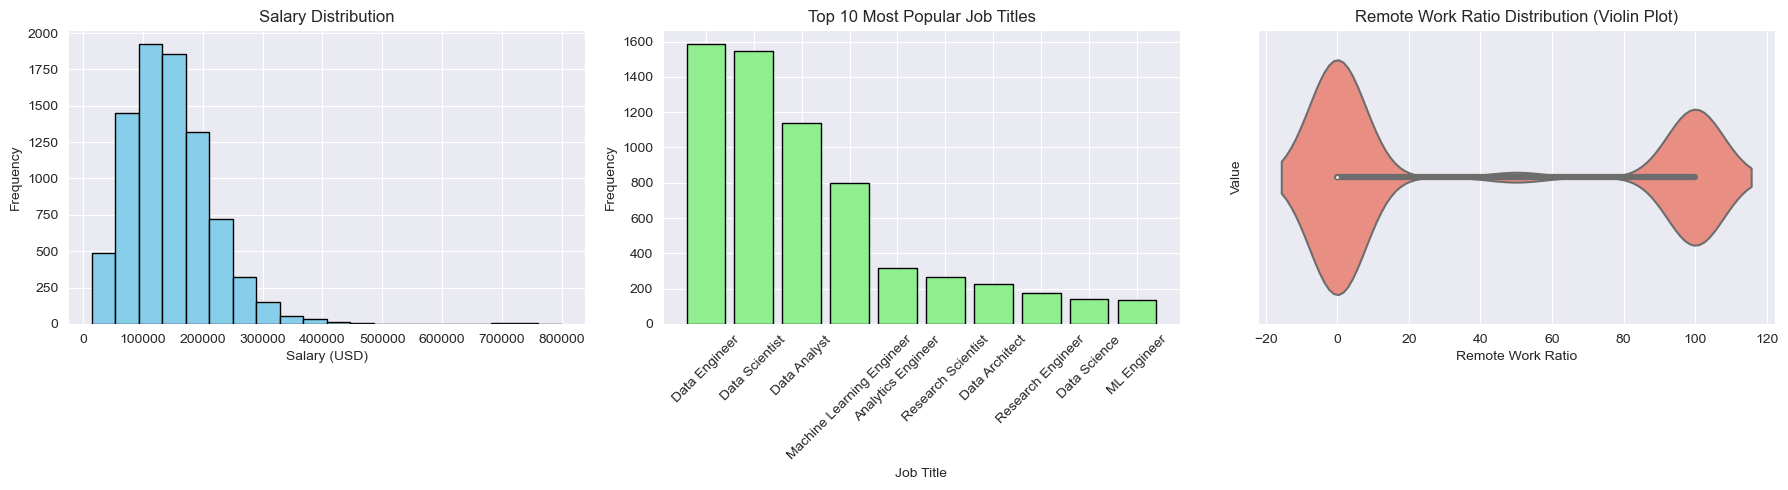

In [23]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

# Salary Distribution (Histogram)
axes[0].hist(df['Salary_in_USD'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Salary Distribution')
axes[0].set_xlabel('Salary (USD)')
axes[0].set_ylabel('Frequency')

# Job Title Distribution (Bar Plot)
job_title_counts = df['Job_Title'].value_counts().head(10)
axes[1].bar(job_title_counts.index, job_title_counts.values, color='lightgreen', edgecolor='black')
axes[1].set_title('Top 10 Most Popular Job Titles')
axes[1].set_xlabel('Job Title')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

# # not so clear
# # Remote Work Ratio Distribution (Histogram)
# axes[2].hist(df['Remote_Ratio'], bins=10, color='salmon', edgecolor='black')
# axes[2].set_title('Remote Work Ratio Distribution')
# axes[2].set_xlabel('Remote Work Ratio')
# axes[2].set_ylabel('Frequency')

# # good alternative
# # Remote Work Ratio Distribution (KDE Plot)
# sns.kdeplot(df['Remote_Ratio'], ax=axes[2], color='salmon', fill=True)
# axes[2].set_title('Remote Work Ratio Distribution')
# axes[2].set_xlabel('Remote Work Ratio')
# axes[2].set_ylabel('Probability Density')

# # Awful option
# # Remote Work Ratio Distribution (Box Plot)
# sns.boxplot(x=df['Remote_Ratio'], ax=axes[2], color='salmon')
# axes[2].set_title('Remote Work Ratio Distribution (Box Plot)')
# axes[2].set_xlabel('Remote Work Ratio')
# axes[2].set_ylabel('Value')

# # better option
# Remote Work Ratio Distribution (Violin Plot)
sns.violinplot(x=df['Remote_Ratio'], ax=axes[2], color='salmon')
axes[2].set_title('Remote Work Ratio Distribution (Violin Plot)')
axes[2].set_xlabel('Remote Work Ratio')
axes[2].set_ylabel('Value')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
